In [ ]:
from math import sqrt
from skimage import data,io,util
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

def normalize(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)


img = io.imread('C:/Users/juanr/Documents/mediciones_ZEISS/bandas/Bandanorm/norm_10.png')
img = rgb2gray(img)
image_gray = util.invert(img)

blobs_log = blob_log(image_gray, max_sigma=15, num_sigma=1, threshold=.001)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=15, threshold=.01)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=15, threshold=.1)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
from skimage import data, feature,io
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

from skimage import data, feature
img = data.coins()
blobs_container = feature.blob_doh(img)

In [ ]:
plt.imshow(img,cmap='gray')
plt.title('DoH blob detection')

for (i,j,k) in blobs_container:
        c = plt.Circle((j, i),k, color='red', linewidth=2, fill=False)
        lplt.add_patch(c)

(<Figure size 720x576 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023763C5CF60>,
       dtype=object))

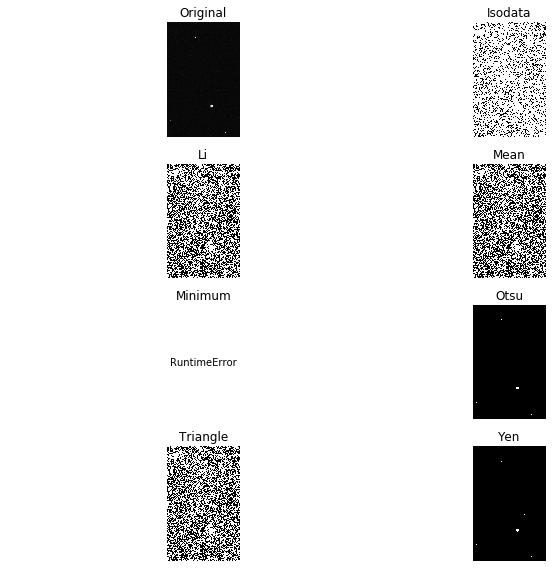

In [1]:
from skimage import data, feature,io,util
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold

img = io.imread('C:/Users/juanr/Documents/mediciones_ZEISS/bandas/Bandanorm/norm_10.png')
img = rgb2gray(img)
img = util.invert(img)

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
try_all_threshold(img, figsize=(10, 8), verbose=False)
#fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
#plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops,regionprops_table
from skimage.morphology import closing, square
from skimage.color import label2rgb


img = io.imread('C:/Users/juanr/Documents/mediciones_ZEISS/bandas/Bandanorm/norm_100.png')
img = rgb2gray(img)
image = util.invert(img)

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border


# label image regions
label_image = label(bw)
image_label_overlay = label2rgb(label_image, image=image)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
pixels_to_microns = 0.586
import pandas as pd
proplist = ['area','convex_area','filled_area','major_axis_length','minor_axis_length',
            'perimeter','equivalent_diameter','extent']
props = regionprops_table(label_image, intensity_image=img, properties=proplist)
df = pd.DataFrame(props)
df['equivalent_diameter'] = df['equivalent_diameter'] * pixels_to_microns
df['area'] = df['area'] * pixels_to_microns **2
df['convex_area']=df['convex_area']*pixels_to_microns**2
df['filled_area']=df['filled_area']*pixels_to_microns**2
df['extent'] = df['extent']*pixels_to_microns**2
df['major_axis_length'] = df['major_axis_length']*pixels_to_microns
df['minor_axis_length'] = df['minor_axis_length']*pixels_to_microns
df['perimeter'] = df['perimeter']*pixels_to_microns

In [ ]:
df